# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt>?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

1. The Hamiltonian is the total energy of a system. The Hamiltonian operator acts on some quantity to find the total energy. In quantum mechanics in one spacial dimension the Hamiltonian operator is given by \begin{equation} \hat{H} = -\frac{ħ^2}{2m} \frac{∂^2}{∂x^2}+V(x,t) \end{equation} or in three dimensions, \begin{equation} \hat{H}=-\frac{ħ^2}{2m}∇^2 +V(\vec{r},t)\end{equation} Using the Hamiltonian Operator the Time-Independent Schrodinger Equation can be rewritten as \begin{equation} \hat{H}ψ = Eψ. \end{equation} I used Introduction to Quantum Mechanics 3rd Ed. by Griffiths and Schroeter (page 27) and the Wikipedia article *Hamiltonian (quantum mechanics)*. 

2. I think the force law in the function harmonic_oscillator() is the potential energy in a spring. Specifically, we're looking at Hooke's Law. The quantity 'particle.x' refers to the x coordinate of a particle, the properties of which I assume are stored somewhere and the '.x' at the end just grabs the x coordinate. The equation we're looking at is \begin{equation}U(x)=\frac{1}{2}kx^2 \end{equation} where k is the spring constant and x is the displacement from equilibrium.

3. Eigenstates are quantities where measured values have no uncertainty (Wikipedia *Introduction to Eigenstates)*. According to the Merriam-Webster online dictionary, "an eigenstate is a state of a quantized dynamic system in which one of the variables defining the state has a determinate fixed value." These quanities include energy and angular momentum.

4. See plots below.

5. The x-axes of the wavy plots (those on the left) show the position of a particle attached to a 'spring.' The spring is pretty small however, because I'm pretty sure the unit of x is Angstroms. I don't believe there is an x-axis for the plots on the right.

6. The plots show the wavefunction of the particle. They cannot be showing probability because they take on both negative and positive values. If they had one or the other I might be able to assume that a minus sign got dropped somewhere, but the fact that we encounter both implies that is not the case.

In [1]:
import sys
!{sys.executable} -m pip install qmsolve
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=ef09748d00cafc5276538e949efaf92b6d41936a3f4c0c06668ec78dfcb525c3
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built progressbar


Computing...
Took 0.0720357894897461
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


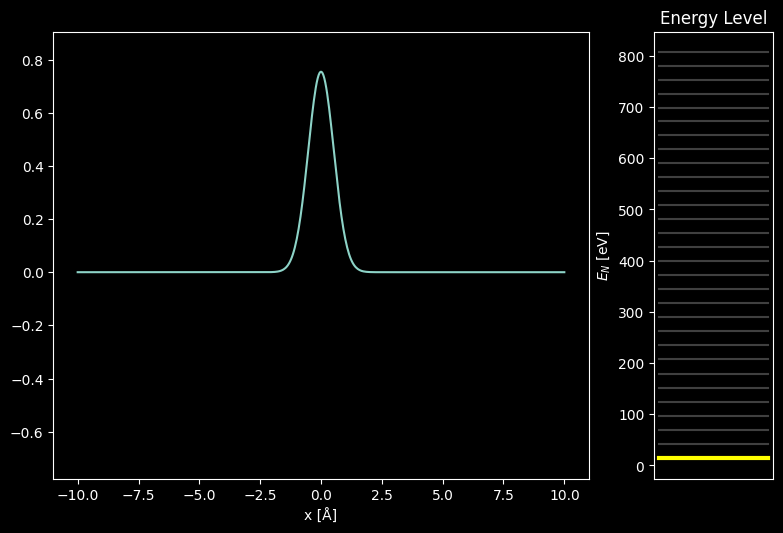

In [2]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

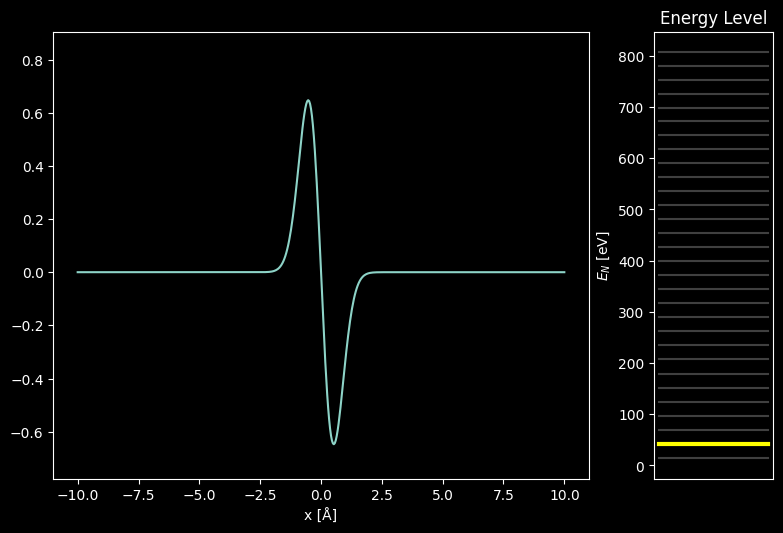

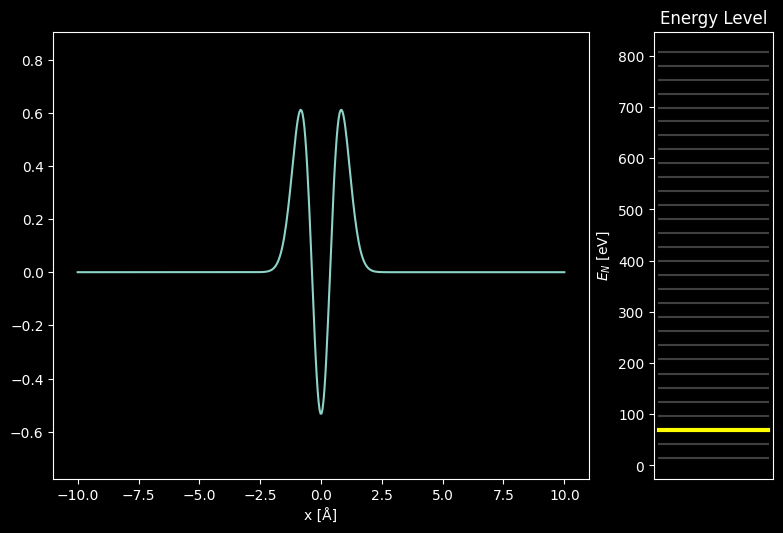

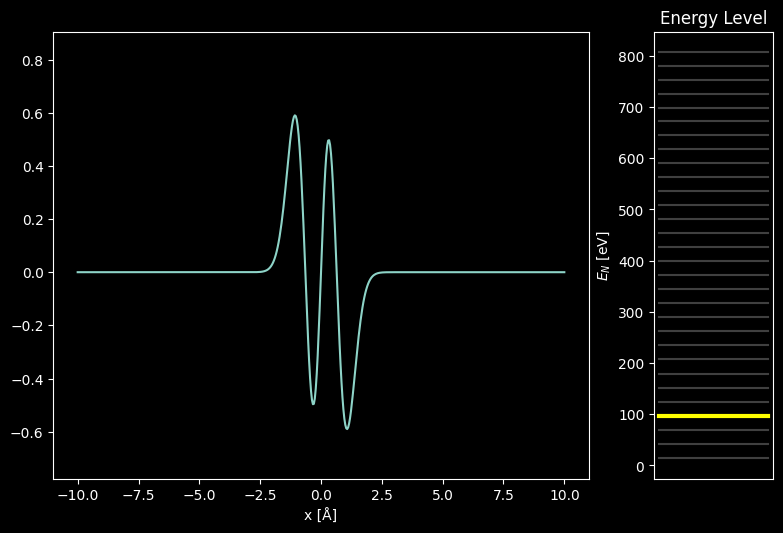

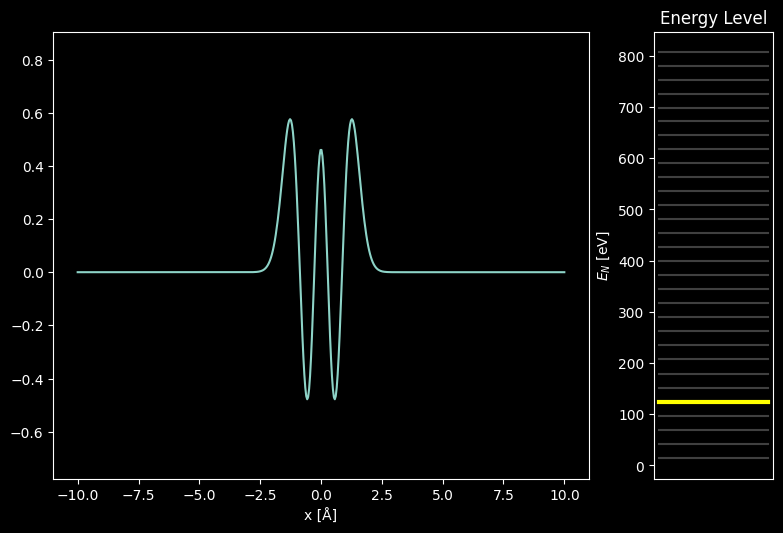

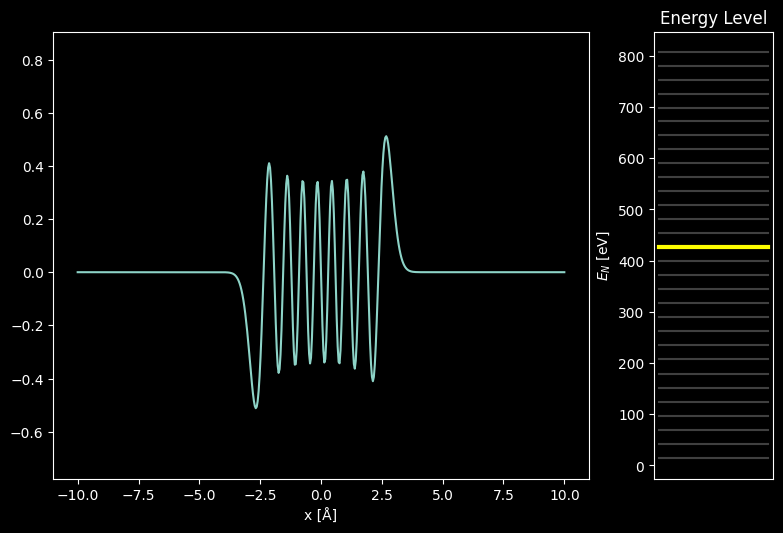

In [6]:
#Print out the visualizations for eigenstates 1-5
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(2)
visualization.plot_eigenstate(3)
visualization.plot_eigenstate(4)
visualization.plot_eigenstate(15)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.02294635772705078
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


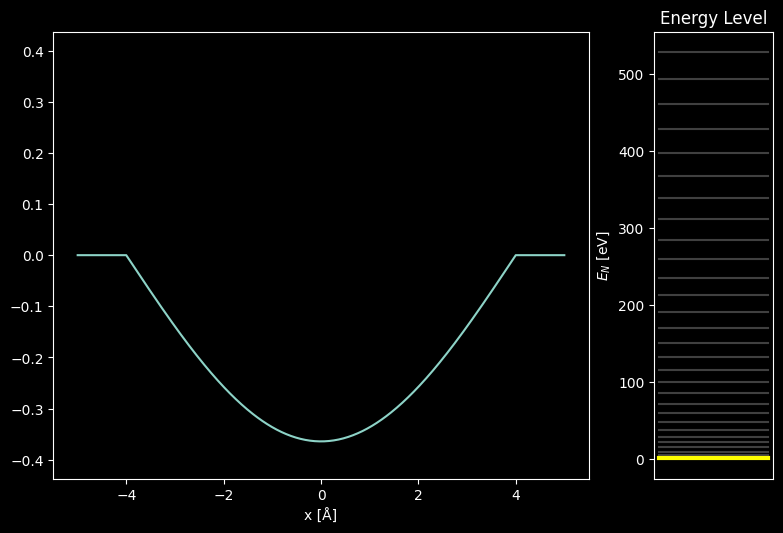

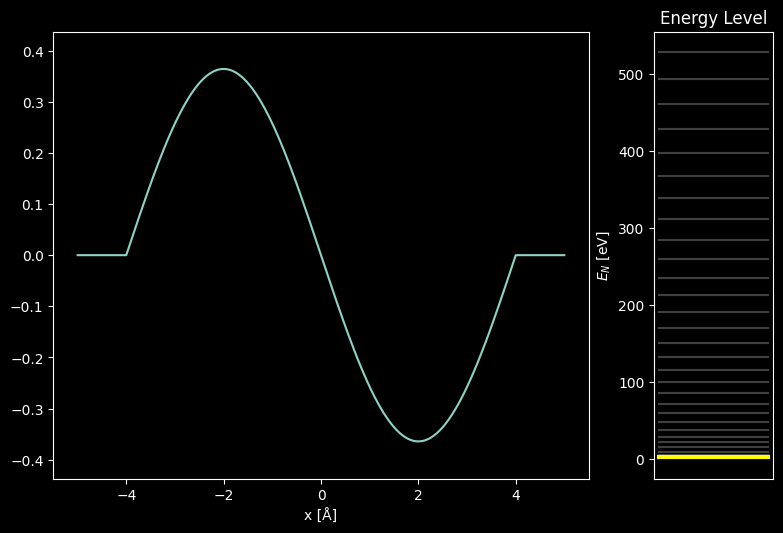

In [4]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class on 4/17)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

7. See plots below

8. I see a couple of differences between the two eigenstate plots, both have to do with the left and right edges of the plot. The easiest answer is that the edges are fixed in place both vertically and horizontally for the infinite square-well (ISW), while for the SHO they are not. The SHO has horizontal edges that taper down as the amplitude drops off, while the ISW stops with a sharp edge. Additionally, the width of the SHO curves looks like it increases as the eigenstate number increases. With the ISW it remains fixed even if we plot a larger eigenstate.

9. The number of maxima and minima is 1 plus the quantum number (which I assume is the number input into the eigenstate function). That is \begin{equation} m=n+1 \end{equation} where m is the combined number of minima and maxima and n is the quantum number. This makes sense because the eigenstates correspond to the energy of the system. A harmonic oscillator with higher energy will oscillate further from its equilibrium position, while a more energetic standing wave (from the ISW) will oscillate more wildly between it's bounds by increasing the number of nodes and antinodes in the standing wave.

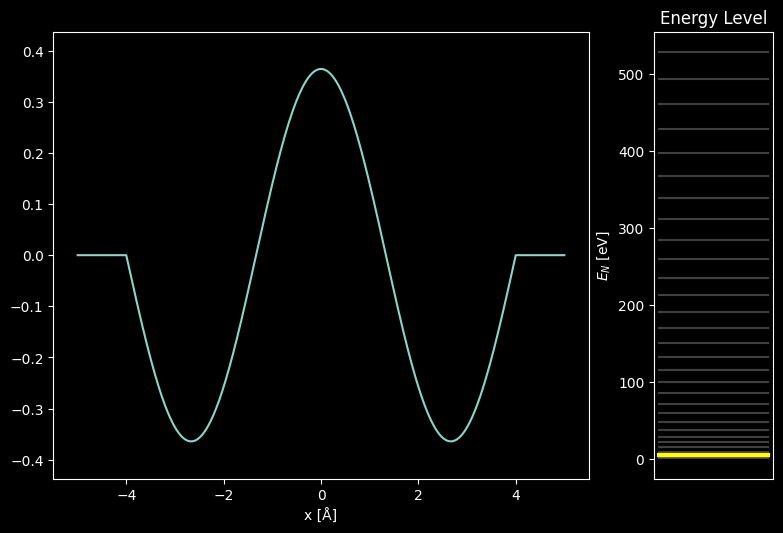

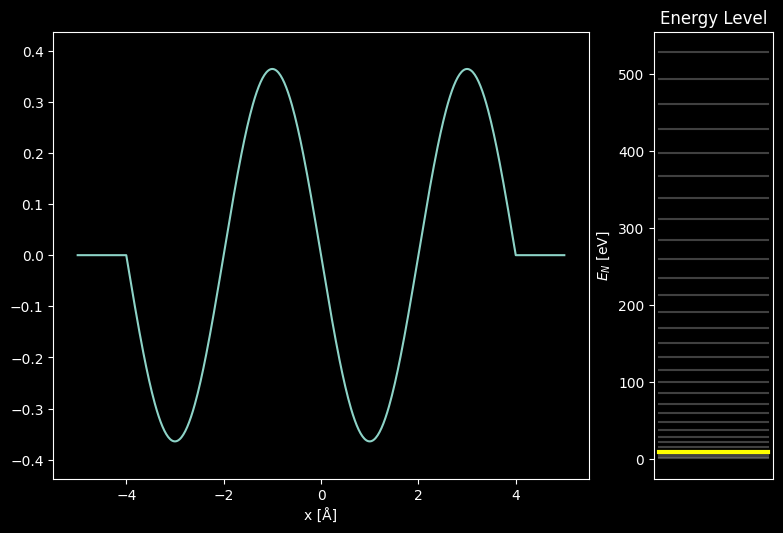

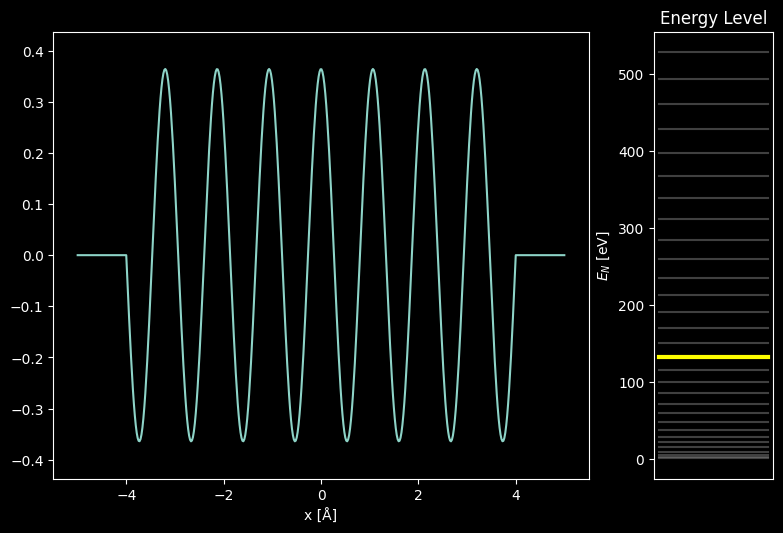

In [5]:
visualization_sw.plot_eigenstate(2)
visualization_sw.plot_eigenstate(3)
visualization_sw.plot_eigenstate(14)

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.04227161407470703


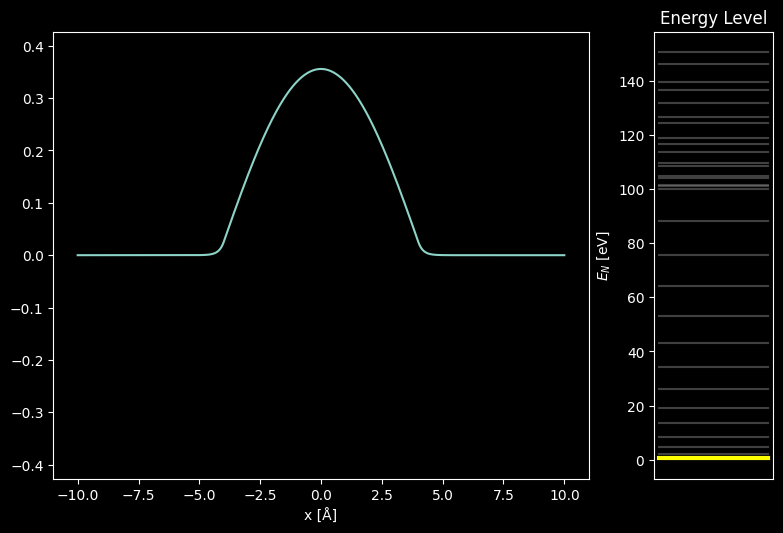

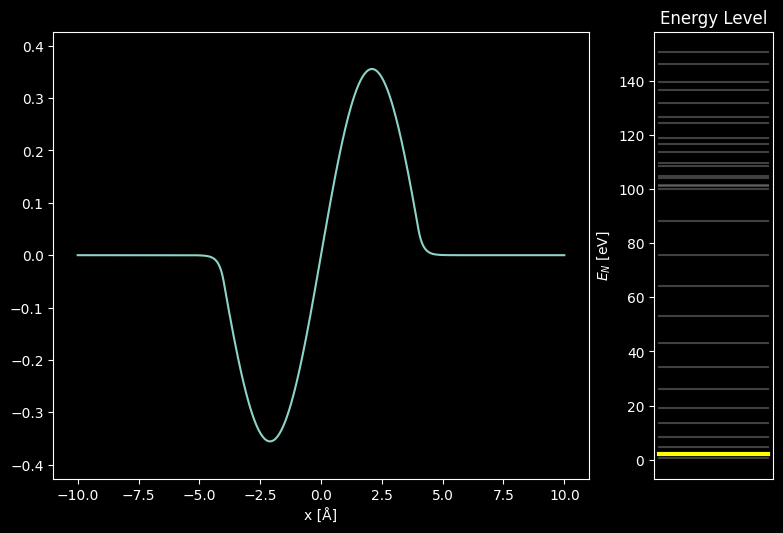

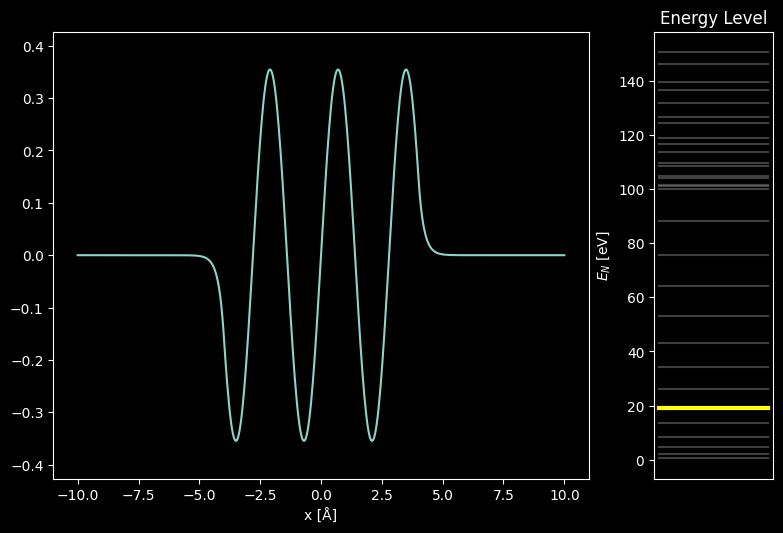

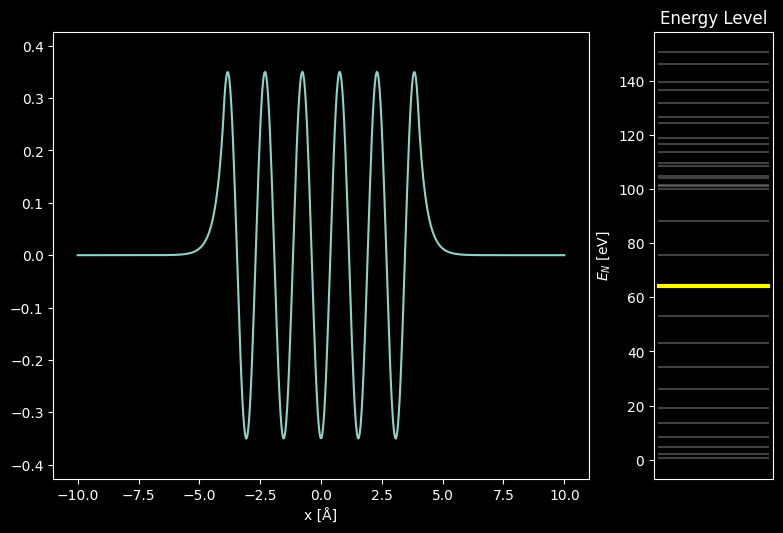

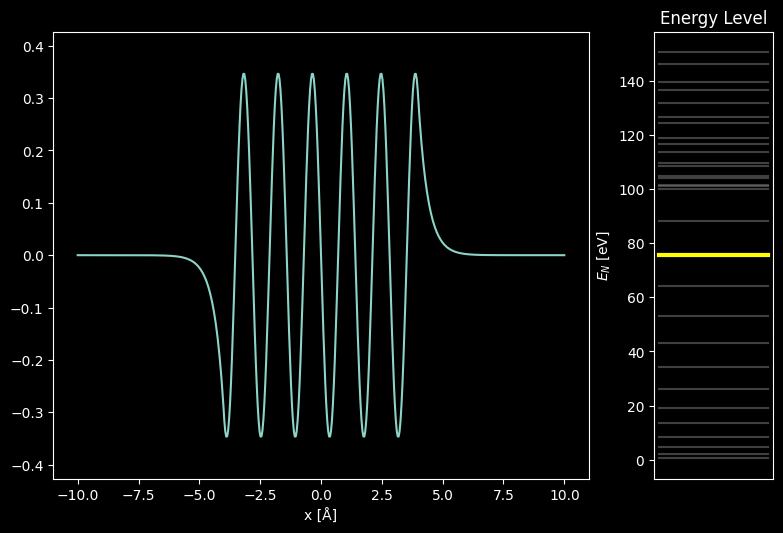

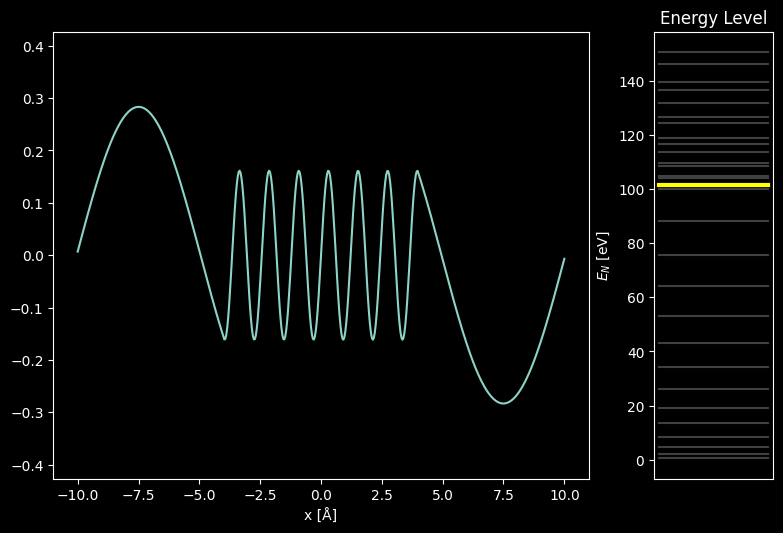

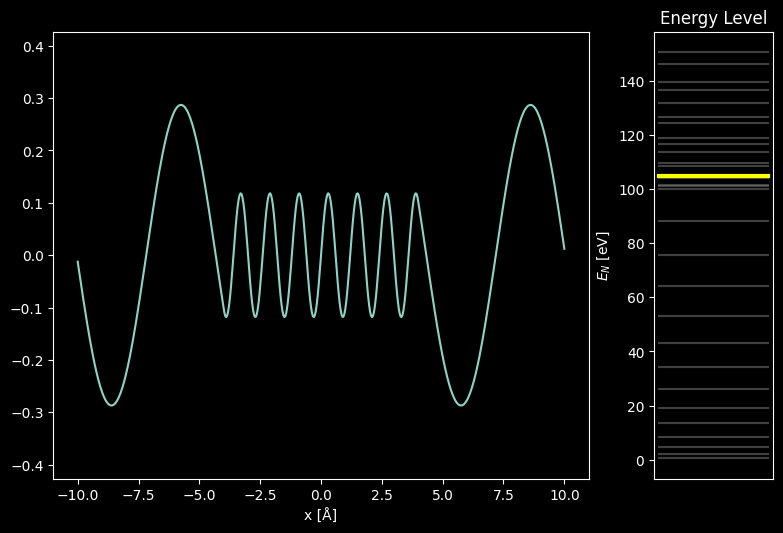

In [10]:
# 8 angstrom-wide finite square well
def finite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = 100 * eV
    return potential

# Define the Hamiltonian of the finite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 20*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

#print(eigenstates_sw.energies)

# Visualize the finite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(10)
visualization_sw.plot_eigenstate(11)
visualization_sw.plot_eigenstate(15)
visualization_sw.plot_eigenstate(17)

10. See plots above.

11. The particle can escape the well even if its energy is below the potential of the square well. In the first 5 plots if you look closely you can see some slight curvature at what would be the boundaries of the well. You can see this easily in the 4th and 5th plots where the wavefunction tapers off as x gets close to 5 (**not** 4). On the right side you can see that the energy of these systems is under the 100 eV potential, but there's still some leakage into the space to the outside of $±$4Å. Since there's some visible leakage at these values close to the potential of the well I think it's safe to assume that the same is true for the lower energy levels.